In [1]:
import numpy as np
import pandas as pd
import statistics
from openpyxl import load_workbook
import random
import seaborn as sns
import os
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('max_rows', 10000)
pd.set_option('max_columns', 100)

In [3]:
zhora1 = []
list_of_bosses = ['зав','зам', 'руково', 'ведущ', 'началь', 'главный']
for position in df['Должность'].unique():
    for _ in list_of_bosses:
        if _ in position.casefold():
            zhora1.append(position)

zhora1 = pd.Series(zhora1)
zhora1 = zhora1.drop_duplicates()
#zhora1

In [4]:
df = pd.read_excel('C:/Users/zhilapv/Desktop/HR_govno/грязное_бельё_3.1.xlsx')
df.head()
df['Руководитель'] = 0
df.loc[(df['Должность'].isin(zhora1), ['Руководитель'])]= 1 # ПИЗДЕЦ

df['Вертикальный рост'] = 0
for i in range(list(df.index)[-1]):
    if df.loc[i]['ФИО'] == df.loc[i+1]['ФИО']:
        if (df.loc[i]['Должность']!=df.loc[i+1]['Должность']) and df.loc[i]['Руководитель']==0 and df.loc[i+1]['Руководитель']==1:
            df.iloc[i+1, 20]= 1
            
list_of_mar = ['Состоит в зарегистрированном браке', 'Состоит в незарегистрированном браке']
list_of_non_mar = ['Разведен(а) официально (развод зарегистрирован)', 'Никогда не состоял(а) в браке', 'Вдовец (вдова)'] 
df['Находится в браке'] = 'Нет'
for i in range(list(df.index)[-1]+1):
    if df.loc[i]['Состояние в браке'] in list_of_mar:
        df.loc[i, 'Находится в браке']= 'Да'
    elif df.loc[i]['Состояние в браке'] in list_of_non_mar:
        df.loc[i, 'Находится в браке']= 'Нет'
        
df['Дети'] = 'Нет'
for i in range(list(df.index)[-1]+1):
    if df.loc[i]['Количество детей'] > 0:
        df.loc[i, 'Дети']= 'Есть'
        
df['Возраст детей'] = '>18'
for i in range(list(df.index)[-1]+1):
    if df.loc[i]['Средний возраст детей'] == 0:
        df.loc[i, 'Возраст детей']= 'Нет детей'
    elif df.loc[i]['Средний возраст детей'] < 18:
        df.loc[i, 'Возраст детей']= '<18'

df_unique = df.copy()
df_unique = df_unique.drop_duplicates(subset='ФИО', keep='last')
df_fired = df_unique[df_unique['Уволен (1 да, 0 нет)']==1]
df_working = df_unique[df_unique['Уволен (1 да, 0 нет)']==0]

In [5]:
df['Средний возраст детей'].count() == df['Дети'].count()

True

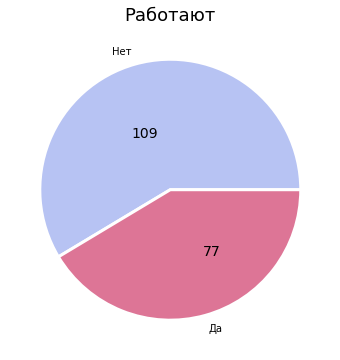

In [6]:
plt.rcParams["figure.figsize"] = (25,6)
plt.pie(df_working['Находится в браке'].value_counts(), colors=['#B7C3F3', '#DD7596'],\
       wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, labels=['Нет', 'Да'])
plt.title('Работают', fontsize=18)
plt.annotate(str(df_working['Находится в браке'].value_counts()[0])\
             , xy=(1, 1), xytext=(-0.3, 0.4), fontsize=14)
plt.annotate(df_working['Находится в браке'].value_counts()[1],\
             xy=(0, 1), xytext=(0.25, -0.5), fontsize=14)
plt.show()

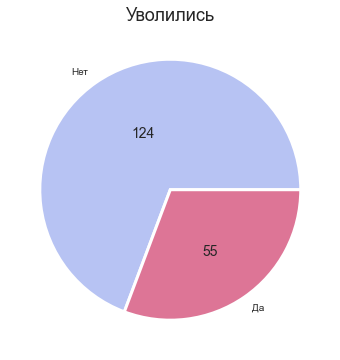

In [176]:
plt.rcParams["figure.figsize"] = (25,6)
plt.pie(df_fired['Находится в браке'].value_counts(), colors=['#B7C3F3', '#DD7596'],\
       wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, labels=['Нет', 'Да'])
plt.title('Уволились', fontsize=18)
plt.annotate(str(df_fired['Находится в браке'].value_counts()[0])\
             , xy=(1, 1), xytext=(-0.3, 0.4), fontsize=14)
plt.annotate(df_fired['Находится в браке'].value_counts()[1],\
             xy=(0, 1), xytext=(0.25, -0.5), fontsize=14)
plt.show()

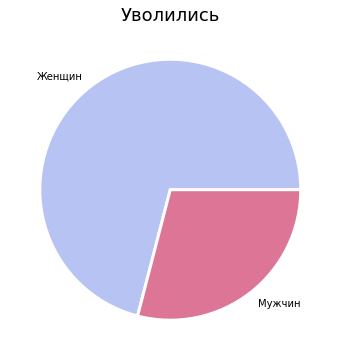

In [84]:
plt.rcParams["figure.figsize"] = (25,6)
plt.pie(df_working['Руководитель'].value_counts(), colors=['#B7C3F3', '#DD7596'],\
       wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, labels=['Женщин', 'Мужчин'])
plt.title('Уволились', fontsize=18)

plt.show()

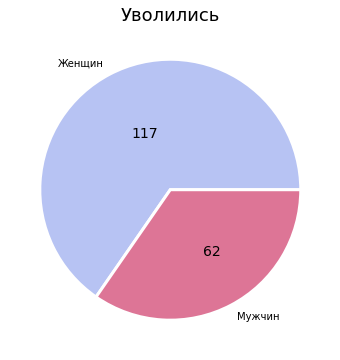

In [56]:
plt.rcParams["figure.figsize"] = (25,6)
plt.pie(df_unique[df_unique['Уволен (1 да, 0 нет)']==1]['Пол'].value_counts(), colors=['#B7C3F3', '#DD7596'],\
       wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, labels=['Женщин', 'Мужчин'])
plt.title('Уволились', fontsize=18)
plt.annotate(str(df_unique[df_unique['Уволен (1 да, 0 нет)']==1]['Пол'].value_counts()[0])\
             , xy=(1, 1), xytext=(-0.3, 0.4), fontsize=14)
plt.annotate(df_unique[df_unique['Уволен (1 да, 0 нет)']==1]['Пол'].value_counts()[1],\
             xy=(0, 1), xytext=(0.25, -0.5), fontsize=14)

plt.show()

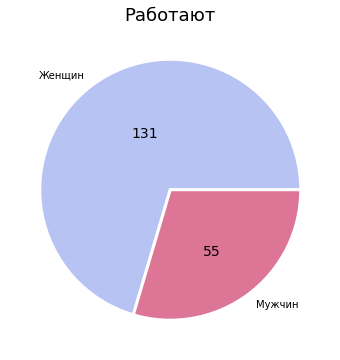

In [57]:
plt.rcParams["figure.figsize"] = (25,6)
plt.pie(df_unique[df_unique['Уволен (1 да, 0 нет)']==0]['Пол'].value_counts(), colors=['#B7C3F3', '#DD7596'],\
       wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, labels=['Женщин', 'Мужчин'])
plt.title('Работают', fontsize=18)
plt.annotate(str(df_unique[df_unique['Уволен (1 да, 0 нет)']==0]['Пол'].value_counts()[0])\
             , xy=(1, 1), xytext=(-0.3, 0.4), fontsize=14)
plt.annotate(df_unique[df_unique['Уволен (1 да, 0 нет)']==0]['Пол'].value_counts()[1],\
             xy=(0, 1), xytext=(0.25, -0.5), fontsize=14)

plt.show()

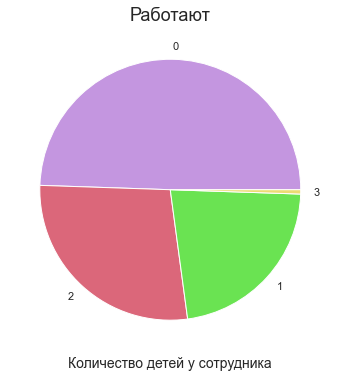

In [381]:
plt.rcParams["figure.figsize"] = (25,6)
plt.pie(df_working['Количество детей'].value_counts(), colors=['#c496e0', '#db677a', '#6ae352', '#ebdc73'],\
       wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, labels=['0', '2', '1', '3'])
plt.title('Работают', fontsize=18)
plt.xlabel('Количество детей у сотрудника', fontsize=14)
plt.show()

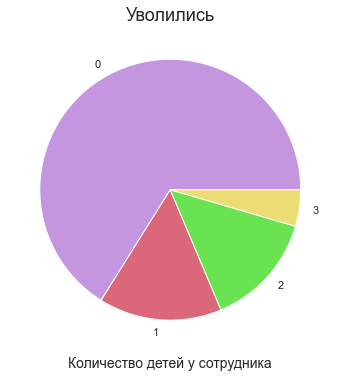

In [382]:
plt.pie(df_fired['Количество детей'].value_counts(), colors=['#c496e0', '#db677a', '#6ae352', '#ebdc73'],\
       wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, labels=['0', '1', '2', '3'])
plt.title('Уволились', fontsize=18)
plt.xlabel('Количество детей у сотрудника', fontsize=14)
plt.show()

In [263]:
# '2018' in df_unique['Дата увольнения']
# df.loc[(df['Должность'].isin(zhora1))]
f18, f19, f20, f21 = 0, 0, 0, 0
for i in range(len(df_unique.index)):#range(list(df_unique.index)[-1]):
    if '2018' in str(df_unique.iloc[i]['Дата увольнения']):
        f18 += 1
    elif '2019' in str(df_unique.iloc[i]['Дата увольнения']):
        f19 += 1
    elif '2020' in str(df_unique.iloc[i]['Дата увольнения']):
        f20 += 1
    elif '2021' in str(df_unique.iloc[i]['Дата увольнения']):
        f21 += 1
df_working.shape[0], f18, f19, f20, f21

(186, 69, 53, 34, 22)

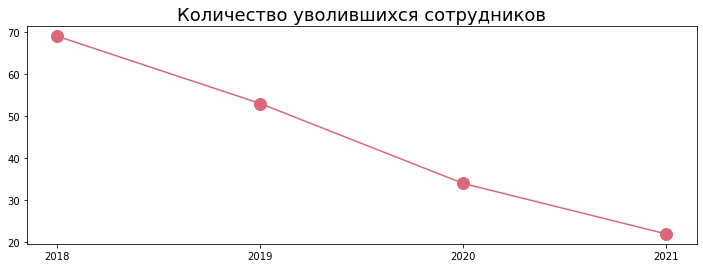

In [85]:
plt.rcParams["figure.figsize"] = (12,4)
df = pd.DataFrame({
      'x_axis': ['2018', '2019', '2020', '2021'],
      'y_axis': [69, 53, 34, 22]
  })

  # plot
plt.plot('x_axis', 'y_axis', data=df, linestyle='-', marker='o', markersize=12, color='#db677a')
plt.title('Количество уволившихся сотрудников', fontsize=18)
plt.show()

In [282]:
df_unique['Уволен (1 да, 0 нет)'].value_counts()

0    186
1    179
Name: Уволен (1 да, 0 нет), dtype: int64

In [264]:
df_working.loc[:'std',['Возраст', 'Стаж (в днях)', 'Количество детей', 'Руководитель', 'Средний возраст детей']].median()

Возраст                    45.0
Стаж (в днях)            1682.5
Количество детей            1.0
Руководитель                0.0
Средний возраст детей       0.0
dtype: float64

In [265]:
df_fired.loc[:'std',['Возраст', 'Стаж (в днях)', 'Количество детей', 'Руководитель', 'Средний возраст детей']].median()

Возраст                   43.0
Стаж (в днях)            787.0
Количество детей           0.0
Руководитель               0.0
Средний возраст детей      0.0
dtype: float64

In [122]:
df_working.describe().loc[:'std',['Возраст', 'Стаж (в днях)', 'Количество детей', 'Руководитель', 'Средний возраст детей']]

,Возраст,Стаж (в днях),Количество детей,Руководитель,Средний возраст детей
count,186.000000,186.000000,186.000000,186.000000,186.000000
mean,45.698925,2411.021505,0.741935,0.290323,6.962366
std,13.875341,1813.522146,0.824008,0.455136,10.128562


In [224]:
df_fired.describe().loc[:'std',['Возраст', 'Стаж (в днях)', 'Количество детей', 'Руководитель', 'Средний возраст детей']]
#round(df_fired.describe().loc[:'std',['Возраст', 'Стаж (в днях)', 'Количество детей', 'Руководитель', 'Средний возраст детей']].loc['count'],)

,Возраст,Стаж (в днях),Количество детей,Руководитель,Средний возраст детей
count,179.000000,179.000000,179.000000,179.000000,179.000000
mean,44.720670,1556.178771,0.581006,0.201117,3.173184
std,15.803931,1621.127216,0.904345,0.401960,6.909378


<AxesSubplot:xlabel='Стаж (в днях)', ylabel='Count'>

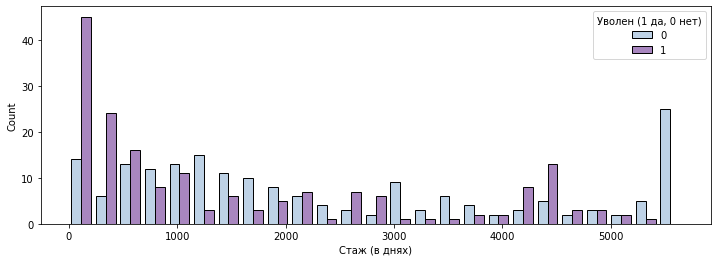

In [86]:
sns.histplot(data=df_unique, x='Стаж (в днях)', hue='Уволен (1 да, 0 нет)', bins=25, palette='BuPu', multiple='dodge',\
             shrink=0.8, )

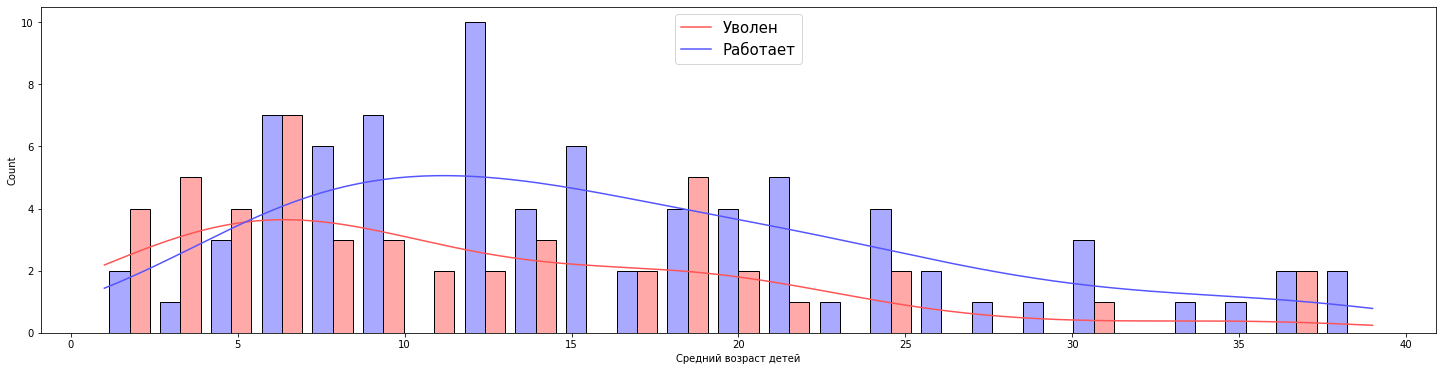

In [89]:
plt.rcParams["figure.figsize"] = (25,6)
sns.histplot(data=df_unique[df_unique['Средний возраст детей']>0], x='Средний возраст детей', hue='Уволен (1 да, 0 нет)', bins=25,\
             palette='seismic', multiple='dodge',shrink=0.8, kde=True).legend(labels=['Уволен', 'Работает'], loc='upper center',\
                                                                              fontsize=15)
#plt.legend(handles=['Нет', 'Да'],loc='center')

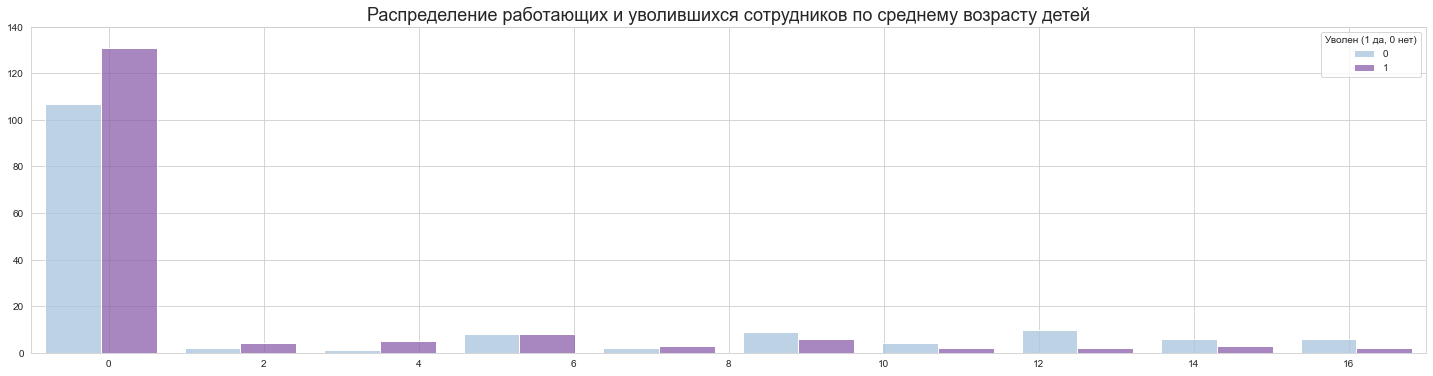

In [204]:
sns.histplot(data=df_unique[df_unique['Средний возраст детей']<18], x='Средний возраст детей', hue='Уволен (1 да, 0 нет)',\
             bins=10, palette='BuPu', multiple='dodge', shrink=0.8)
plt.title('Распределение работающих и уволившихся сотрудников по среднему возрасту детей', fontsize=18)
plt.ylim(0, 140)
plt.xlim(-1, 17)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [120]:
df_working['Средний возраст детей'].count()

186

In [11]:
df.groupby('Пол')['Возраст'].median()

Пол
Женский    50.0
Мужской    45.0
Name: Возраст, dtype: float64

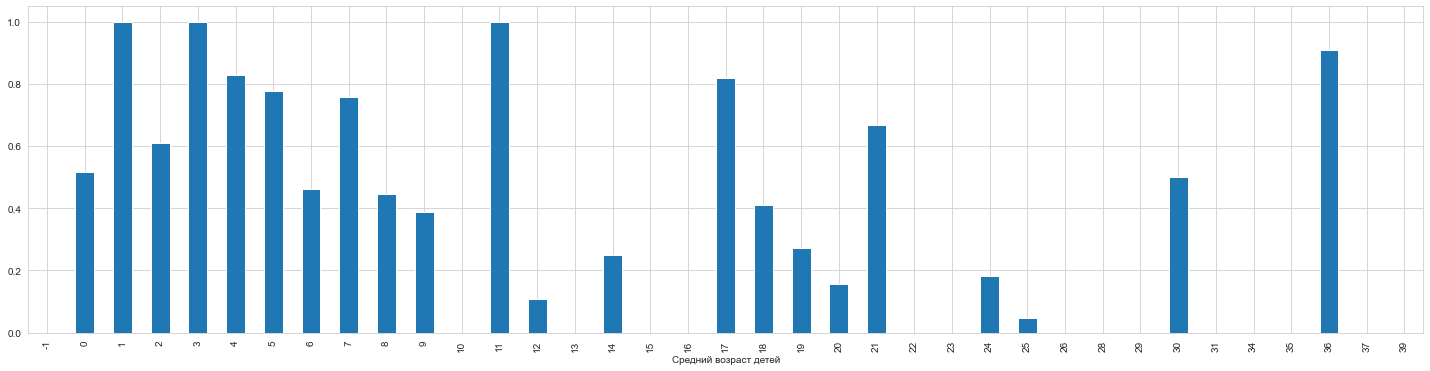

In [126]:
df.groupby('Средний возраст детей')['Уволен (1 да, 0 нет)'].mean().plot.bar()
#df.groupby('Средний возраст детей')['Уволен (1 да, 0 нет)'].mean().plot.bar()

plt.show()

In [124]:
df.head()

,x_axis,y_axis
0,2018,69
1,2019,53
2,2020,34
3,2021,22


In [133]:
#df.groupby('Состояние в браке')['Уволен (1 да, 0 нет)'].sum().plot.bar()
sns.histplot(data=df.groupby('Состояние в браке')['Уволен (1 да, 0 нет)'], hue='Уволен (1 да, 0 нет)')
plt.show()

# sns.histplot(data=df_unique[df_unique['Средний возраст детей']<18], x='Средний возраст детей', hue='Уволен (1 да, 0 нет)',\
#              bins=10, palette='BuPu', multiple='dodge', shrink=0.8)

ValueError: The following variable cannot be assigned with wide-form data: `hue`

In [9]:
df.describe()

,Возраст,Стаж (в днях),"Должность занималась, дней",Количество детей,Минимальный возраст детей,Средний возраст детей,Максимальный возраст детей,"Уволен (1 да, 0 нет)"
count,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000
mean,49.181537,3303.748451,2180.278191,0.882900,7.293680,6.341388,5.417596,0.451053
std,14.327145,1752.222021,1468.775289,0.900805,10.595031,9.677980,9.042455,0.497753
min,19.000000,0.000000,4.000000,0.000000,-9.000000,-9.000000,-11.000000,0.000000
25%,37.000000,1632.000000,904.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,3845.000000,2139.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,4662.000000,3308.000000,2.000000,13.000000,10.000000,8.000000,1.000000
max,86.000000,5663.000000,5743.000000,3.000000,43.000000,39.000000,39.000000,1.000000


In [73]:
os.chdir(u)
os.getcwd()

'C:\\Users\\zhilapv\\Desktop\\HR_govno'

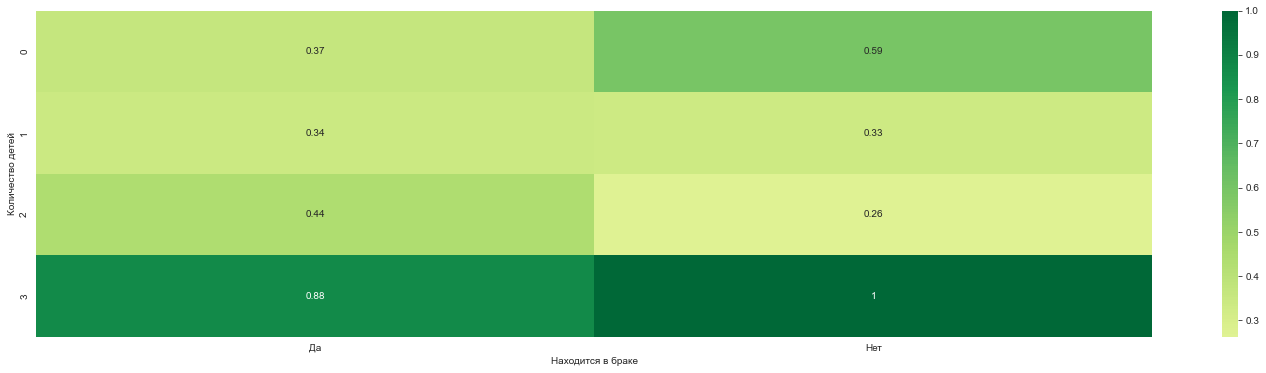

In [151]:
result = pd.pivot_table(data=df_unique, index='Количество детей', columns='Находится в браке',values='Уволен (1 да, 0 нет)')
#print(result)

#create heat map of education vs marital vs response_rate
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

In [150]:
(df_unique.groupby('Количество детей')['Находится в браке'].count())

Количество детей
0    210
1     77
2     69
3      9
Name: Находится в браке, dtype: int64

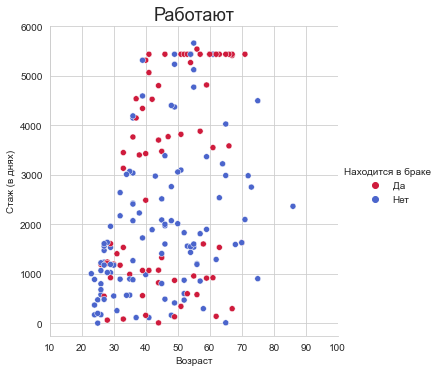

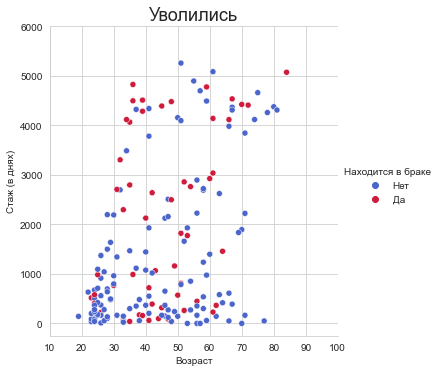

In [157]:
sns.set_style('whitegrid')
s1 = sns.relplot(data=df_working, x="Возраст", y="Стаж (в днях)", hue="Находится в браке",\
            sizes=(20, 450), palette={'Нет':'#4b65cc', 'Да':'#cf1b3c'})#.legend(labels=['Уволен', 'Работает'],\
                                                                                #       loc='right', fontsize=15)
s1.legend
plt.title('Работают', fontsize=18)
plt.ylim(-250, 6000)
plt.xlim(10, 100)

sns.relplot(data=df_fired, x="Возраст", y="Стаж (в днях)", hue="Находится в браке",\
            sizes=(20, 450), palette={'Нет':'#4b65cc', 'Да':'#cf1b3c'})
plt.title('Уволились', fontsize=18)
plt.ylim(-250, 6000)
plt.xlim(10, 100)
plt.show()

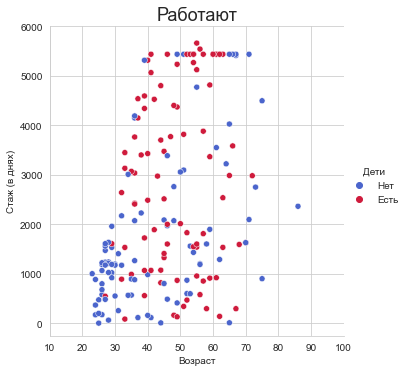

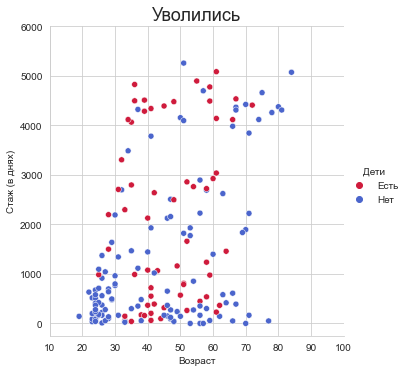

In [190]:
sns.set_style('whitegrid')
s1 = sns.relplot(data=df_working, x="Возраст", y="Стаж (в днях)", hue="Дети",\
            sizes=(20, 450), palette={'Нет':'#4b65cc', 'Есть':'#cf1b3c'})#.legend(labels=['Уволен', 'Работает'],\
                                                                                #       loc='right', fontsize=15)
s1.legend
plt.title('Работают', fontsize=18)
plt.ylim(-250, 6000)
plt.xlim(10, 100)

sns.relplot(data=df_fired, x="Возраст", y="Стаж (в днях)", hue="Дети",\
            sizes=(20, 450), palette={'Нет':'#4b65cc', 'Есть':'#cf1b3c'})
plt.title('Уволились', fontsize=18)
plt.ylim(-250, 6000)
plt.xlim(10, 100)
plt.show()

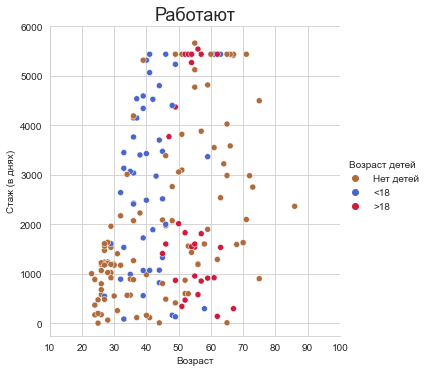

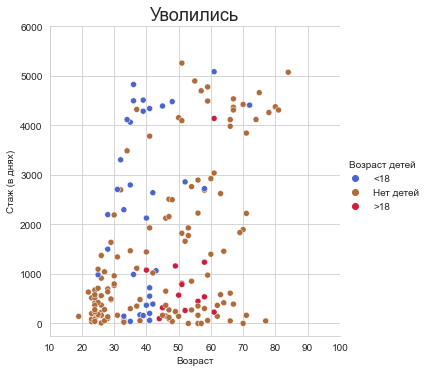

In [219]:
sns.set_style('whitegrid')
s1 = sns.relplot(data=df_working, x="Возраст", y="Стаж (в днях)", hue="Возраст детей",\
            sizes=(20, 450), palette={'<18':'#4b65cc', '>18':'#cf1b3c', 'Нет детей':'#af6b3c'})
                                                                                
s1.legend
plt.title('Работают', fontsize=18)
plt.ylim(-250, 6000)
plt.xlim(10, 100)

sns.relplot(data=df_fired, x="Возраст", y="Стаж (в днях)", hue="Возраст детей",\
            sizes=(20, 450), palette={'<18':'#4b65cc', '>18':'#cf1b3c', 'Нет детей':'#af6b3c'})
plt.title('Уволились', fontsize=18)
plt.ylim(-250, 6000)
plt.xlim(10, 100)

plt.show()

In [254]:
sns.relplot(data=df_unique[(df_unique['Находится в браке']=='Нет') & (df_unique['Дети']=='Есть')],\
            x="Возраст", y="Стаж (в днях)", hue="Уволен (1 да, 0 нет)",\
            sizes=(20, 450), palette={0:'#4b65cc', 1:'#cf1b3c'})
plt.title('Сотрудники с детьми, не находящиеся в браке', fontsize=18)
plt.ylim(-250, 6000)
plt.xlim(10, 100)

sns.relplot(data=df_unique[(df_unique['Находится в браке']=='Нет') & (df_unique['Возраст детей']=='<18')],\
            x="Возраст", y="Стаж (в днях)", hue="Уволен (1 да, 0 нет)",\
            sizes=(20, 450), palette={0:'#4b65cc', 1:'#cf1b3c'})
plt.title('Сотрудники с детьми, находящиеся в браке', fontsize=18)
plt.ylim(-250, 6000)
plt.xlim(10, 100)

plt.show(
#df_unique[(df_unique['Находится в браке']=='Нет') & (df_unique['Возраст детей']=='<18')]

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_13712/4027286972.py, line 16)

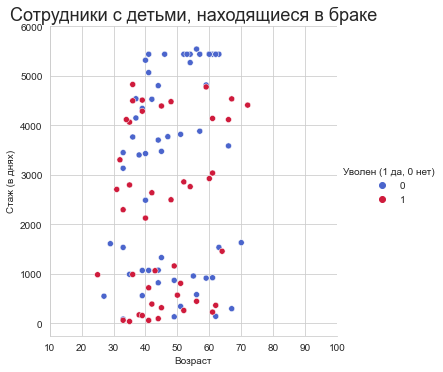

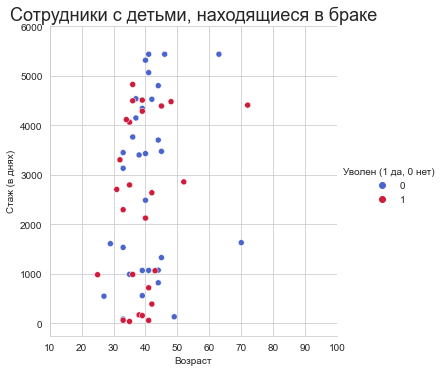

In [252]:
sns.relplot(data=df_unique[(df_unique['Находится в браке']=='Да') & (df_unique['Дети']=='Есть')],\
            x="Возраст", y="Стаж (в днях)", hue="Уволен (1 да, 0 нет)",\
            sizes=(20, 450), palette={0:'#4b65cc', 1:'#cf1b3c'})
plt.title('Сотрудники с детьми, находящиеся в браке', fontsize=18)
plt.ylim(-250, 6000)
plt.xlim(10, 100)

sns.relplot(data=df_unique[(df_unique['Находится в браке']=='Да') & (df_unique['Возраст детей']=='<18')],\
            x="Возраст", y="Стаж (в днях)", hue="Уволен (1 да, 0 нет)",\
            sizes=(20, 450), palette={0:'#4b65cc', 1:'#cf1b3c'})
plt.title('Сотрудники с детьми, находящиеся в браке', fontsize=18)
plt.ylim(-250, 6000)
plt.xlim(10, 100)

plt.show()

In [249]:
df_unique.head(3)

,Пол,ФИО,Возраст,Стаж (в днях),Образование,Наименование образовательного учреждения,Квалификация по документу об образовании,Направление или специальность по документу,Должность,Отдел,"Должность занималась, дней",Состояние в браке,Количество детей,Минимальный возраст детей,Средний возраст детей,Максимальный возраст детей,Адрес места жительства,Дата увольнения,"Уволен (1 да, 0 нет)",Руководитель,Вертикальный рост,Находится в браке,Дети,Возраст детей
1,Женский,Алиярова Гюлселем Рамисовна,32,1176,"Высшее образование - специалитет, магистратура","ФГБОУ ВПО ""Дагестанский государственный универ...",Химик,Химия,Химик-эксперт,ЛАБОРАТОРИЯ ФИЗИКО-ХИМИЧЕСКИХ ИССЛЕДОВАНИЙ,1130,Состоит в зарегистрированном браке,0,0,0,0,"РОССИЯ, Москва г, Лебедянская ул, дом 22, кор...",0,0,0,0,Да,Нет,Нет детей
4,Женский,Андросова Ольга Викторовна,53,1562,Высшее образование,Московкий ин-т тонкой химической технологии им...,инженер технолог,Биотехнология,Заместитель заведующего отделом - врач-лаборант,002. ОТДЕЛ ЛАБОРАТОРНОГО ДЕЛА,1130,NaN,0,0,0,0,"Москва г, Южнобутовская ул, дом № 25, корпус ...",0,0,1,0,Нет,Нет,Нет детей
6,Мужской,Антонов Дмитрий Владиславович,58,298,Высшее образование,Московский технический университет связи и инф...,Инженер,Многоканальные телекоммуникационные системы,Инженер,ОТДЕЛ АДМИНИСТРАТИВНО-ХОЗЯЙСТВЕННОГО ОБЕСПЕЧЕНИЯ,42,Разведен(а) официально (развод зарегистрирован),1,12,12,12,"РОССИЯ, Московская обл, г Химки, ул Зеленая, ...",0,0,0,0,Нет,Есть,<18


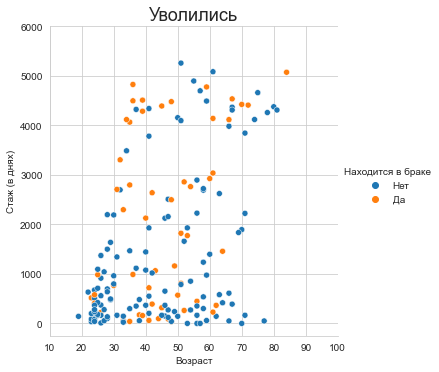

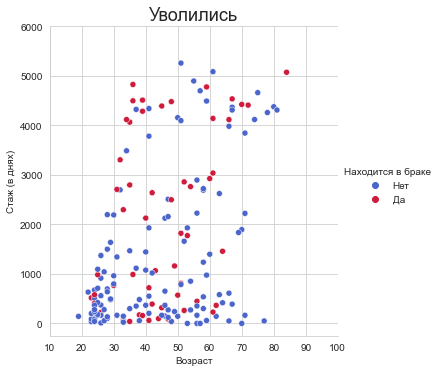

In [160]:
sns.relplot(data=df_fired, x="Возраст", y="Стаж (в днях)", hue="Находится в браке",\
            sizes=(20, 450),)# palette={'Нет':'#4b65cc', 'Да':'#cf1b3c'})
plt.title('Уволились', fontsize=18)
plt.ylim(-250, 6000)
plt.xlim(10, 100)

sns.relplot(data=df_fired, x="Возраст", y="Стаж (в днях)", hue="Находится в браке",\
            sizes=(20, 450), palette={'Нет':'#4b65cc', 'Да':'#cf1b3c'})
plt.title('Уволились', fontsize=18)
plt.ylim(-250, 6000)
plt.xlim(10, 100)
plt.show()

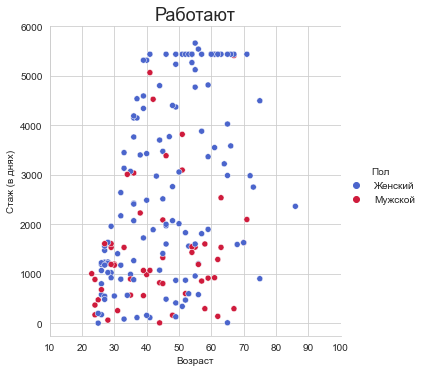

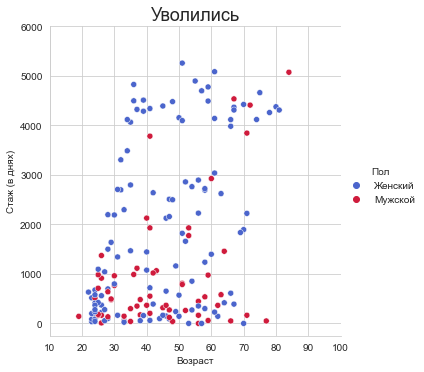

In [152]:
#sns.set_theme(style="whitegrid")
sns.set_style('whitegrid')
#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
s1 = sns.relplot(data=df_working, x="Возраст", y="Стаж (в днях)", hue="Пол",\
            sizes=(20, 450), palette={'Женский':'#4b65cc', 'Мужской':'#cf1b3c'})#.legend(labels=['Уволен', 'Работает'],\
                                                                                #       loc='right', fontsize=15)
s1.legend
plt.title('Работают', fontsize=18)
plt.ylim(-250, 6000)
plt.xlim(10, 100)

sns.relplot(data=df_fired, x="Возраст", y="Стаж (в днях)", hue="Пол",\
            sizes=(20, 450), palette={'Женский':'#4b65cc', 'Мужской':'#cf1b3c'})
plt.title('Уволились', fontsize=18)
plt.ylim(-250, 6000)
plt.xlim(10, 100)
plt.show()

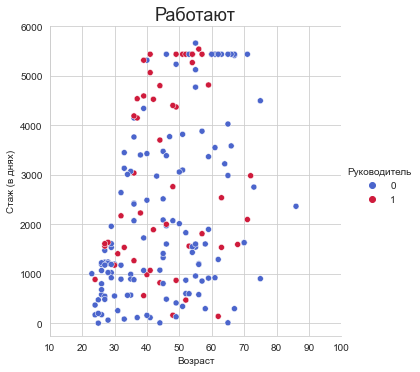

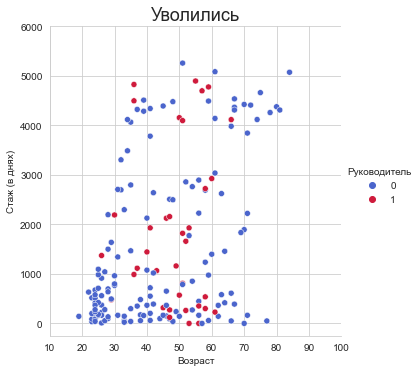

In [117]:
#sns.set_theme(style="whitegrid")
sns.set_style('whitegrid')
#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.relplot(data=df_working, x="Возраст", y="Стаж (в днях)", hue="Руководитель",\
            sizes=(20, 450), palette={0:'#4b65cc', 1:'#cf1b3c'})
plt.title('Работают', fontsize=18)
plt.ylim(-250, 6000)
plt.xlim(10, 100)

sns.relplot(data=df_fired, x="Возраст", y="Стаж (в днях)", hue="Руководитель",\
            sizes=(20, 450), palette={0:'#4b65cc', 1:'#cf1b3c'})
plt.title('Уволились', fontsize=18)
plt.ylim(-250, 6000)
plt.xlim(10, 100)
plt.show()

In [18]:
df['ФИО'].nunique()

365

In [19]:
df['Отдел'].nunique()

159

<AxesSubplot:xlabel='Возраст', ylabel='Стаж (в днях)'>

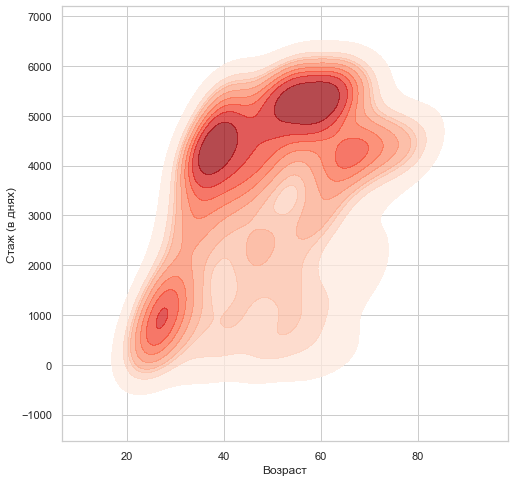

In [124]:
sns.kdeplot(data=df, x='Возраст', y='Стаж (в днях)', fill=False, cmap="Reds", shade=True, alpha=0.75)

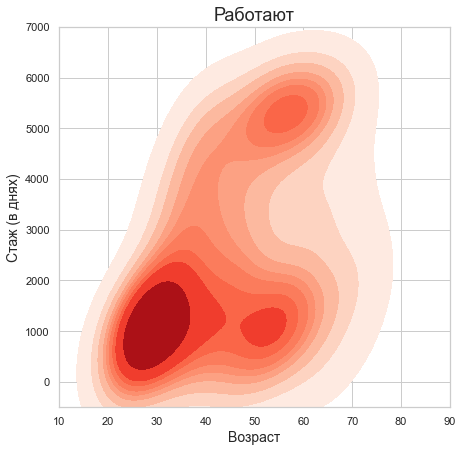

In [255]:
sns.set(rc={'figure.figsize':(7,7)})
sns.set_style("whitegrid")
ax = sns.kdeplot(data=df_unique[df_unique['Уволен (1 да, 0 нет)']==0], x='Возраст', y='Стаж (в днях)', fill=False, cmap="Reds", shade=True)
ax.set_title('Работают', fontsize=18)
plt.xlabel('Возраст', fontsize='14')
plt.ylabel('Стаж (в днях)', fontsize='14')
plt.xlim(10, 90)
plt.ylim(-500, 7000)

#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})


#sns.kdeplot(x=df['Возраст'], y=df['Стаж (в днях)'], fill=False, cmap="Reds", shade=True)
plt.show()

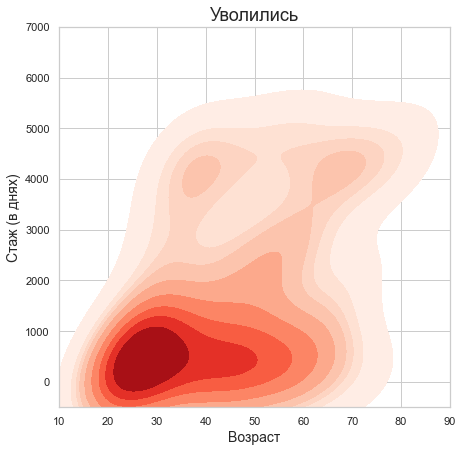

In [254]:
sns.set(rc={'figure.figsize':(7,7)})
sns.set_style("whitegrid")
ax = sns.kdeplot(data=df_unique[df_unique['Уволен (1 да, 0 нет)']==1], x='Возраст', y='Стаж (в днях)', fill=False, cmap="Reds", shade=True)
ax.set_title('Уволились', fontsize=18)
plt.xlabel('Возраст', fontsize='14')
plt.ylabel('Стаж (в днях)', fontsize='14')
plt.xlim(10, 90)
plt.ylim(-500, 7000)
plt.show()

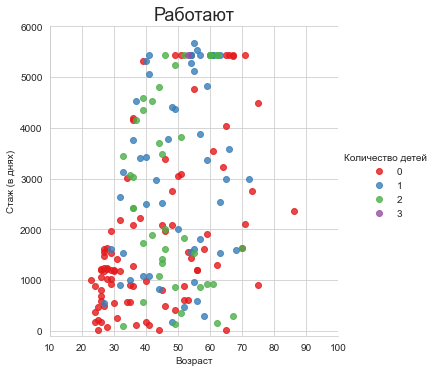

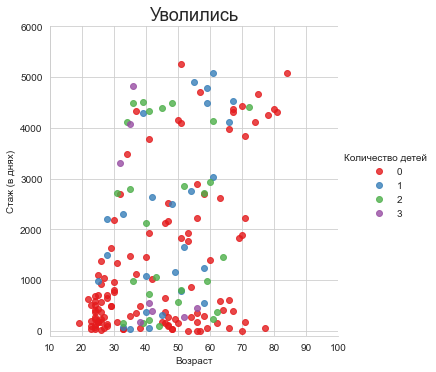

In [118]:
plt.rcParams["figure.figsize"] = (25,6)
sns.set_style("whitegrid")
lmp_1 = sns.lmplot(data=df_unique[df_unique['Уволен (1 да, 0 нет)']==0], x='Возраст', y='Стаж (в днях)', hue='Количество детей', fit_reg=False,palette='Set1')
plt.title('Работают', fontsize=18)
plt.ylim(-100, 6000)
plt.xlim(10, 100)
lmp_2 = sns.lmplot(data=df_unique[df_unique['Уволен (1 да, 0 нет)']==1], x='Возраст', y='Стаж (в днях)', hue='Количество детей', fit_reg=False,palette='Set1')
plt.title('Уволились', fontsize=18)
plt.ylim(-100, 6000)
plt.xlim(10, 100)
plt.show()

In [247]:
df_unique[df_unique['Возраст']<22]#['Стаж (в днях)'].sort_values(ascending=False)[2:25]

,Пол,ФИО,Возраст,Стаж (в днях),Образование,Наименование образовательного учреждения,Квалификация по документу об образовании,Направление или специальность по документу,Должность,Отдел,"Должность занималась, дней",Состояние в браке,Количество детей,Минимальный возраст детей,Средний возраст детей,Максимальный возраст детей,Адрес места жительства,Дата увольнения,"Уволен (1 да, 0 нет)"
1100,Мужской,Веселов Валентин Александрович,19,143,NaN,NaN,NaN,NaN,Техник,009. ОТДЕЛ МЕТРОЛОГИЧЕСКОГО И НОРМАТИВНО-МЕТОД...,143,Никогда не состоял(а) в браке,0,0,0,0,"РОССИЯ, Московская обл, Серпухов г, Луначарск...",12.02.2019,1


In [33]:
df_unique[df_unique['Уволен (1 да, 0 нет)']==0].shape[0], df_unique[df_unique['Уволен (1 да, 0 нет)']==1].shape[0]

(188, 177)

In [27]:
df_unique[((df_unique['Возраст']>=20) & (df_unique['Возраст']<=30)) & (df_unique['Уволен (1 да, 0 нет)']==0)].shape[0],\
df_unique[((df_unique['Возраст']>=20) & (df_unique['Возраст']<=30)) & (df_unique['Уволен (1 да, 0 нет)']==1)].shape[0]

(36, 43)

In [28]:
df_unique[df_unique['Количество детей']==0].shape[0], df_unique[df_unique['Количество детей']==1].shape[0],\
df_unique[df_unique['Количество детей']==2].shape[0], df_unique[df_unique['Количество детей']==3].shape[0]

(210, 77, 69, 9)